# Wariacyjne Autoencodery

Na dzisiejszych (i koljenych) zajęciach zajmiemy się modelami generatywnymi, tj. takimi, które potrafią "generować" nowe, nie widziane wcześniej (choć podobne do zaobserwowanych) przykłady.

## Vanilla Autoencoder

![Auto-encoder](resources/ae.png)

"Vanilla" autoenkodery minimalizują tzw. *reconstruction error*, najczęściej wyrażony w postaci błędu średniokwadratowego liczonego pomiędzy oryginalnym wejściem i rekonstrukcją.

<font size=4>
$$ \mathcal{L}\Big(x, D\big(E(x)\big)\big) = \big|\big|x - D \big(E(x)\big)\big|\big|^2 $$
</font>

Enkoder i dekoder mogą być dowolnymi sieciami neuronowymi, najczęściej jednak dekoder składam się z tych samych transformacji co enkoder w odwrtonej kolejności.  

**Pytanie:** Co mogłoby się stać gdybyśmy nie "zwężali" enkodera? 

### Setup i Dane

In [1]:
%matplotlib inline

from utils import plot_digits

import torch

from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Lambda, Compose

import matplotlib.pyplot as plt

import numpy as np


torch.manual_seed(1337) 
batch_size = 64 
transforms = Compose([ToTensor(), Lambda(lambda x: x.flatten())])

# Mnist dataset
train_data = MNIST(root='.', 
                   train=True, 
                   transform=transforms,    
                   download=True) # change to false if you already have the data

# Data Loader for easy mini-batch return in training, the image batch shape will be (50, 1, 28, 28)
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

## Zadanie 1. Vanilla Autoencoder

Zaimplementować Autoenkoder z 5 warstwami liniowymi (z nieliniową aktywacją np. `tanh`) w enkoderze: 
   * wejściowa (rozmiar cyfry z MNISTA)
   * rozmiaru 128
   * rozmiaru 64
   * rozmiaru 12
   * rozmiaru `latent_dim`
oraz dekoderem z dokładnie odwrotnym przekształceniem.
    
**Pytanie:** Jaka powinna być funkcja aktywacji na wyjściu dekodera? 

In [3]:
class AutoEncoder(torch.nn.Module):
    
    def __init__(self, latent_dim):
        
        super(AutoEncoder, self).__init__()
        
        self.latent_dim = latent_dim
        
        self.encoder = ???
        self.decoder = ???

        
    def decode(self, z):
        return ???
    
    def encode(self, x):
        return ???

    def forward(self, x):
        # encode and decode
        return ???

## Zadanie 2. Pętla Uczenia AE
Uzupełnić brakujące fragmenty kodu uczenia.

Epoch:  0 | train loss: 0.2314


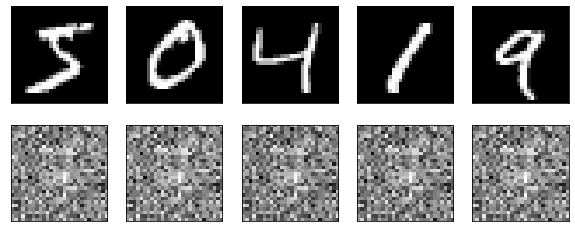

Epoch:  0 | train loss: 0.0482


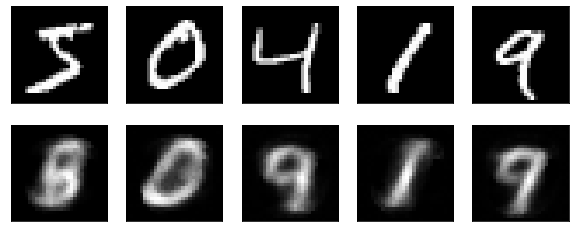

Epoch:  5 | train loss: 0.0364


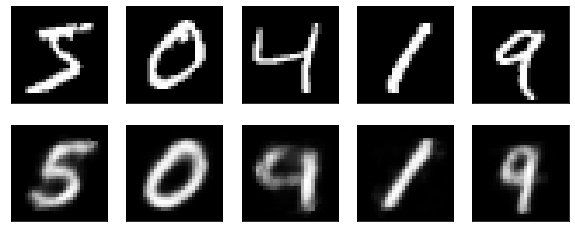

Epoch:  5 | train loss: 0.0347


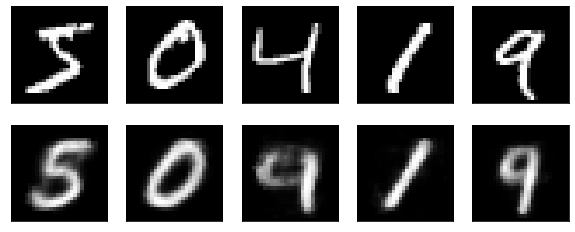

Epoch:  9 | train loss: 0.0365


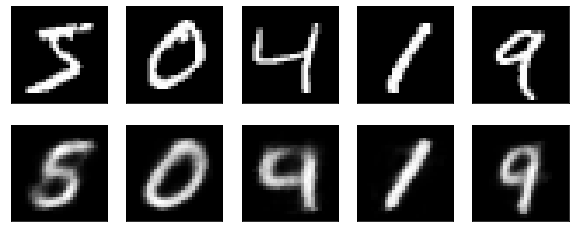

Epoch:  9 | train loss: 0.0348


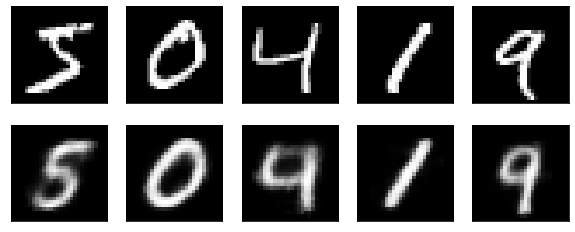

In [5]:
# Hyper Parameters
epochs = 10
lr = 0.005         # learning rate
n_plots = 5

# prepare original data for plotting
view_data = train_data.data[:n_plots].view(-1, 28*28).type(torch.FloatTensor) / 255.

autoencoder = AutoEncoder(latent_dim=3)

optimizer = torch.optim.Adam(autoencoder.parameters(), lr=lr)
loss_func =  ??? # Use MSE loss function


for epoch in range(epochs):
    for step, (x, y) in enumerate(train_loader):

        encoded, decoded = ??? 

        loss = ??? # calculate loss
        optimizer.zero_grad()   # clear gradients for this training step
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

        if step % 500 == 0 and epoch in [0, 5, epochs - 1]:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.item())

            # plotting decoded image (second row)
            _, decoded_data = autoencoder(view_data)
            
            plot_digits(view_data, decoded_data)

## Zadanie 3. Variational Autoencoder

Tym razem zajmiemy się modelem VAE. W porównaniu do zwykłego autoenkodera, VAE w warstwie latent space próbuje utrzymać rozkład normalny. Dzieje się to dzięki dwuczęściowej funkcji kosztu, która z jednej strony jest kosztem rekonstrukcji podobnym do rekonstrukcji autoenkodera, z drugiej strony porównuje latent space z próbkowanym rozkładem normalnym:

<br>
<font size=4>
$$ \mathcal{L}(X, z) = \mathbb{E}\big[\log P(X|z)\big] - D_{KL}\big[Q(z|X) \big|\big| P(z)\big] $$
</font>
    
- $P(X|z)$ - rozkład generowanych danych przy danej zmiennej ukrytej $z$ (dekoder)
- $P(z)$ - rozkład prawdopodobieństwa zmiennej ukrytej
- $Q(z|X)$ - rozkład zmiennej ukrytej przy danym $X$ (enkoder)

Pierwszą część funkcji kosztu można obliczyć przy pomocy kosztu regresji logistycznej (binarna entropia krzyżowa). Drugą część można rozpisać:

<br>
<font size=4>
$$ D_{KL}\big[N(\mu(X), \Sigma(X)) \big|\big| N(0, 1)\big] = \frac{1}{2} \sum_k \big(\exp(\Sigma(X)) + \mu^2(X) - 1 - \Sigma(X)\big)$$
    </font>

![VAE](resources/VAE.png)

In [6]:
class VAE(torch.nn.Module):
    
    def __init__(self, latent_dim):
        
        super(VAE, self).__init__()
        
        self.latent_dim = latent_dim
        
        self.encoder = ???
        self.decoder = ???
        
    def reparametrize(self, mu, logvar):
        return ???
    
    def decode(self, z):
        return ???
    
    def encode(self, x):
        return ???

    def forward(self, x):
        # encode and decode
        return ???

## Zadanie 4. Pętla Uczenia VAE

Uzupełnić brakujące fragmenty kodu uczenia oraz funkcji kosztu.

Epoch:  0 | train loss: 34898.8711


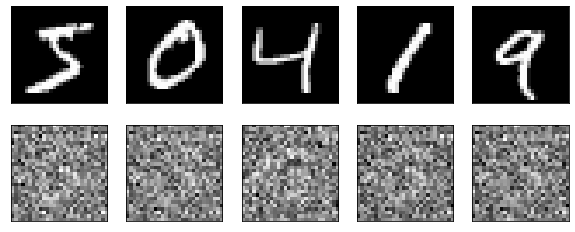

Epoch:  0 | train loss: 11199.5020


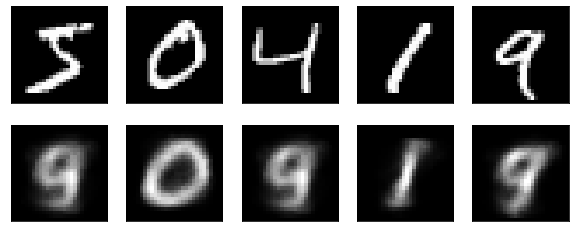

Epoch:  5 | train loss: 10681.9170


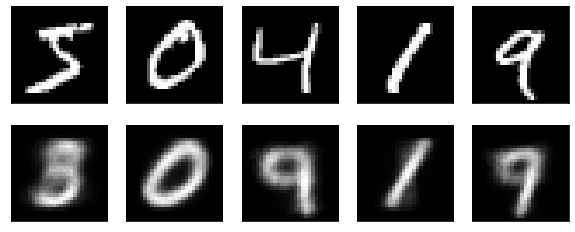

Epoch:  5 | train loss: 10854.5371


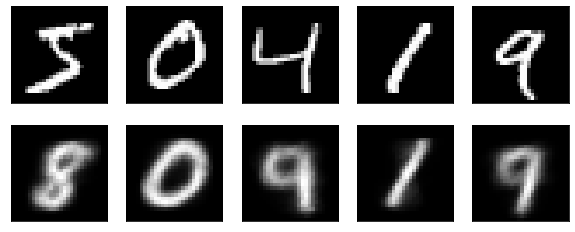

Epoch:  9 | train loss: 11230.2178


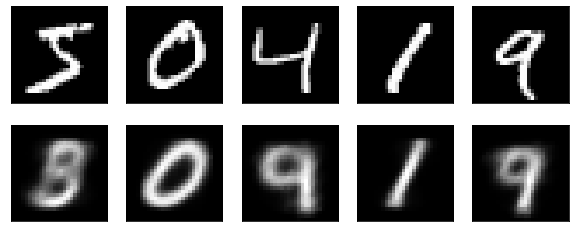

Epoch:  9 | train loss: 10488.1260


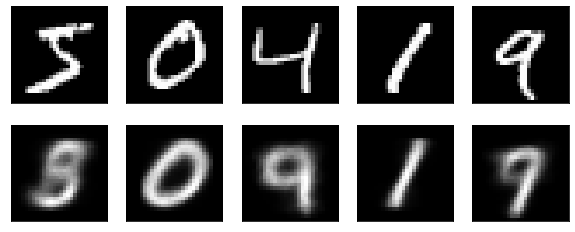

In [7]:
# Hyper Parameters
epochs = 10
LR = 0.005         # learning rate
n_plots = 5
latent_dim = 3

# prepare original data for plotting
view_data = train_data.data[:n_plots].view(-1, 28*28).type(torch.FloatTensor) / 255.

vae = VAE(latent_dim = latent_dim)

optimizer = torch.optim.Adam(vae.parameters(), lr=LR)

def loss_func(x_decoded, x, z_mu, z_var):
    BCE = ???
    KLD = ???

    return BCE + KLD

for epoch in range(epochs):
    for step, (x, y) in enumerate(train_loader):

        encoded, decoded, mu, var = ??? 

        loss = ??? # calculate loss
        optimizer.zero_grad()   # clear gradients for this training step
        loss.backward()         # backpropagation, compute gradients
        optimizer.step()        # apply gradients

        if step % 500 == 0 and epoch in [0, 5, epochs - 1]:
            print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.item())

            # plotting decoded image (second row)
            _, decoded_data, _, _ = vae(view_data)
            
            plot_digits(view_data, decoded_data)

## Zadanie 5. Generowanie nowych przykładów

### 5.1 AE

Teoretycznie nasz "vanilla" autoenkoder nie ma naturalnych właściwości generatywnych (więcej w przyszłości przy VAE), ale mimo to spróbujmy wygenerować z niego nowe przykłady.

1. Załóżmy, że nasz autoenkoder układa dane "w środku" w rozkład normalny. Waszym zadaniem jest oszacowanie średniej i wariancji tego rozkładu dla `n` przykładów ze zbioru trenującego. 

In [8]:
samples = []
n = 500

for step, (x, y) in enumerate(train_loader):
    
    if len(samples) > n:
        break
    
    ???

    samples.append(???)
    
sampled_z = np.concatenate(samples, axis=0)

# compute mean and std of the empirical distribution in the latent space 
mean_z = ???
std_z = ???

2. Używając rozkładu normalnego sparametryzowanego policzonymi momentami wylosuj kilka przykład i zwizualizuj ich rekonstrukcje.

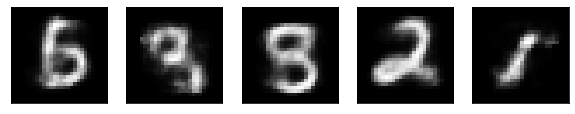

In [9]:
z_sampled = ??? # sample 5 points in the latent space
x_decoded = ??? # decode the sampled points

plot_digits(x_decoded)

### 5.2 VAE

Wylosować 5 punktów z rozkładu $\mathcal{N}(0,1)$ i wygenerować z nich cyfry MNIST przy pomocy dekodera. Teraz już nie musimy liczyć statystyk latent space'a, bo znamy rozkład zmiennej $z$.

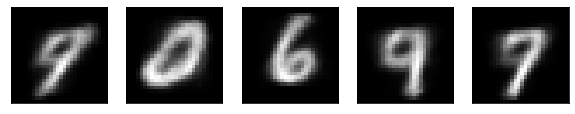

In [10]:
%matplotlib inline

z_sampled = ??? # sample 5 points in the latent space
x_decoded = ??? # decode the sampled points

plot_digits(x_decoded)